<a href="https://colab.research.google.com/github/aakashagarwal6898/Ocular/blob/master/Ocular_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Dependencies
!pip install pyocr  
!sudo apt-get install tesseract-ocr-eng

In [0]:
########### Importing Libraries ###############
from PIL import Image    
import sys              
import pyocr             
import pyocr.builders
from google.colab.patches import cv2_imshow 
import cv2
import numpy as np       

In [0]:
############ Initializations #################

tools = pyocr.get_available_tools()
if len(tools) == 0:
    print("No OCR tool found")
    sys.exit(1)
tool = tools[0]
BINARY_THREHOLD= 180        #Set the binary threshold value
lang="eng"                      #Set the default language to english



In [0]:
########### Image pre-processing method definitions ############

def remove_noise_and_smooth(file_name):
  
  img = cv2.imread(file_name, 0)
  filtered = cv2.adaptiveThreshold(img.astype(np.uint8), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 41,3)
  kernel = np.ones((1, 1), np.uint8)
  opening = cv2.morphologyEx(filtered, cv2.MORPH_OPEN, kernel)
  closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
  img = image_smoothening(img)
  or_image = cv2.bitwise_or(img, closing)
  
  return or_image

def image_smoothening(img):           
  ret1, th1 = cv2.threshold(img, BINARY_THREHOLD, 255, cv2.THRESH_BINARY)
  ret2, th2 = cv2.threshold(th1, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  blur = cv2.GaussianBlur(th2, (1, 1), 0)
  ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  
  return th3

def process_image(doc_img):
  intermediate_image = remove_noise_and_smooth(doc_img)
  cv2.imwrite("./Intermediate_image.png",intermediate_image)
  intermediate_image2 = r"./Intermediate_image.png"
  #cv2_imshow(intermediate_image)
  txt = tool.image_to_string(
      Image.open(intermediate_image2),
      lang=lang,
      builder=pyocr.builders.TextBuilder()
  )
  word_boxes = tool.image_to_string(
      Image.open(intermediate_image2),
      lang=lang,
      builder=pyocr.builders.WordBoxBuilder()
  )
  return txt, word_boxes

def ocr_predict(input_img):
  txt, word_boxes = process_image(input_img)
  img = cv2.imread(input_img, cv2.IMREAD_UNCHANGED)
  font = cv2.FONT_HERSHEY_PLAIN          
  for box in word_boxes:
    conf = str(box.confidence)
    if(int(conf)>50):
      top_left,bot_right= box.position[0],box.position[1]
      cv2.putText(img, conf,top_left,font, 1, (0, 0, 0), 1, cv2.FILLED) 
      final_img=cv2.rectangle(img, top_left, bot_right, (154, 220, 255), 1) 
    
  cv2_imshow(final_img)
  cv2.imwrite("output_image.png",final_img)

  output_text = open("output_text.txt","w")
  output_text.write(txt)
  output_text.close()




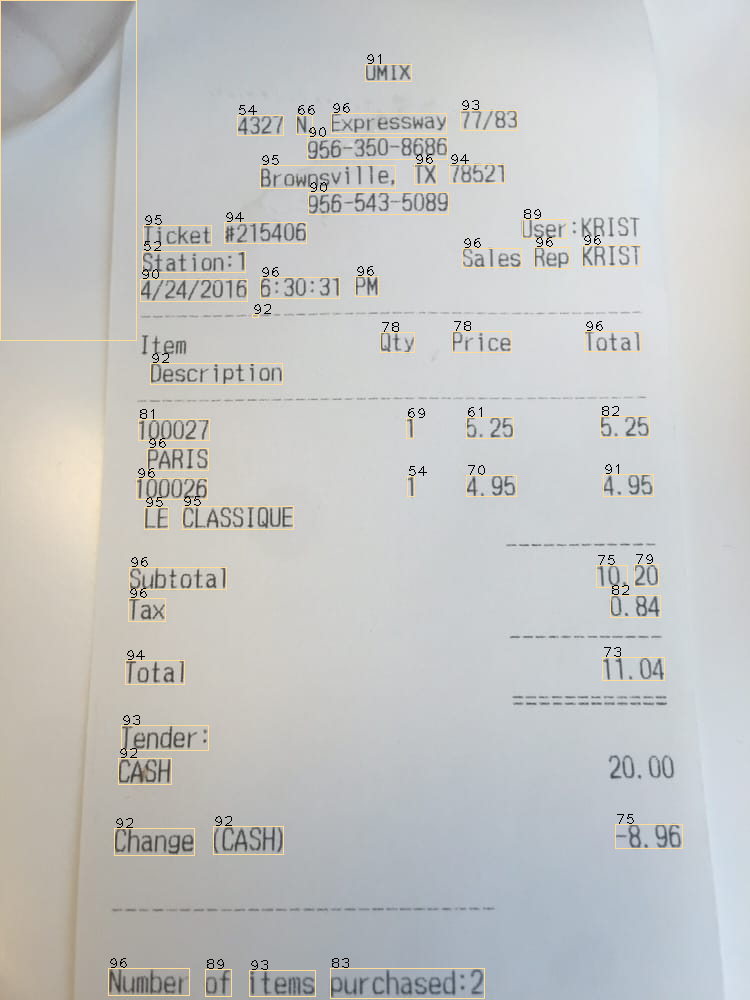

CPU times: user 160 ms, sys: 23 ms, total: 183 ms
Wall time: 2.69 s


In [67]:
%%time
BINARY_THREHOLD= 180 
input_img= r"/content/1017-receipt.jpg"  #Input Image
ocr_predict(input_img)